Para esto necesitarás tener instaladas las bibliotecas necesarias, como tensorflow (que incluye Keras), instalar el siguiente comando:

# LeNet (Implementación en Keras)

LeNet es una red neuronal convolucional sencilla, diseñada para trabajar con imágenes en escala de grises.

LA convolución es una operación matemática que combina los valores de una matriz de filtro con los de una entrada (como una imagen) para extraer características.



In [ ]:
#PyTorch es una librería que sirve para construir y entrenar redes neuronales (programas que "aprenden" de datos).
#Aquí simplemente la estamos importando.

import torch

def block(c_in, c_out, k=3, p=1, s=1):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.Tanh(),
        torch.nn.AvgPool2d(2, stride=2)
    )


'''
c_in: cantidad de canales de entrada (por ejemplo, 1 canal = imagen en blanco y negro; 3 canales = imagen a color).

c_out: cantidad de canales de salida (como la cantidad de "filtros" o "características" que queremos aprender).

k: tamaño del filtro o kernel (por defecto 3x3).

p: cantidad de relleno ("padding") para la imagen (por defecto 1 píxel alrededor).

s: tamaño del paso ("stride") para mover el filtro (por defecto 1 píxel por vez).

Dentro del bloque hay:

torch.nn.Conv2d: una capa convolucional (extrae patrones como bordes, texturas).

torch.nn.Tanh(): una función de activación que convierte los números para que estén entre -1 y 1.

torch.nn.AvgPool2d(2, stride=2): reduce el tamaño de la imagen (hace que ocupe la mitad).

Resumen de block: Conv2D ➔ Tanh ➔ Pooling.
'''

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )


#Esta función crea un bloque más sencillo:
#Linear es una capa totalmente conectada (como multiplicar matrices).
#ReLU es otra función de activación (convierte negativos a cero, muy usada en redes modernas).


class LeNet5(torch.nn.Module):


#Aquí se define el modelo completo: se llama LeNet-5, un modelo clásico
#para reconocer imágenes, como dígitos (0-9) en el dataset MNIST.

  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()

    '''
    n_channels=1 significa que espera imágenes en blanco y negro.
    n_outputs=10 significa que clasifica en 10 clases (por ejemplo, dígitos 0 a 9).
    super().__init__() llama a la inicialización de torch.nn.Module, que es el padre de todas las redes en PyTorch.
    '''
    self.conv1 = block(n_channels, 6, 5, p=0)
    #Toma la imagen (1 canal) y crea 6 "imágenes" nuevas (6 filtros), con filtros de tamaño 5x5, sin padding.
    self.conv2 = block(6, 16, 5, p=0)
    #Toma esas 6 "imágenes" y las procesa para crear 16 nuevas.
    self.conv3 = torch.nn.Sequential(
        torch.nn.Conv2d(16, 120, 5, padding=0),
        torch.nn.Tanh()
    )
    #Toma las 16 "imágenes" y las convierte en 120 valores finales
    #aplicando un último filtrado.

    self.fc1 = block2(120, 84)
    #Después convierte esos 120 valores en 84 valores usando una capa Linear + ReLU.
    self.fc2 = torch.nn.Linear(84, 10)
    #Finalmente convierte esos 84 valores en 10 salidas (una por cada número del 0 al 9).

  def forward(self, x):
    #método que lo qué pasa con los datos cuando el modelo recibe una imagen.

    x = self.conv1(x)# Primero bloque: conv1
    x = self.conv2(x)# Segundo bloque: conv2
    x = self.conv3(x)# Tercer bloque: conv3
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [ ]:
lenet5 = LeNet5()
output = lenet5(torch.randn(64, 1, 32, 32))
output.shape

#torch.Size([64, 10]) significa "64 imágenes procesadas,
#cada una con 10 salidas (una por clase posible)".

torch.Size([64, 10])

# Explicación del código, ejemplo simplificado de la red neuronal LeNet-5 utilizando PyTorch.

- **Funciones de bloque**: La función `block` define un bloque de capas que incluye una convolución 2D, una activación `Tanh`, y un `AvgPool2d`. `block2` es un bloque de capas completamente conectadas seguido de una activación `ReLU`.
  
- **Clase LeNet-5**: La clase `LeNet5` define la red. Tiene:
  1. Dos bloques convolucionales (con 6 y 16 filtros).
  2. Una capa convolucional adicional con 120 filtros.
  3. Dos capas completamente conectadas (con 84 y 10 unidades, respectivamente).
  


# Imagen generada con ChatGPT





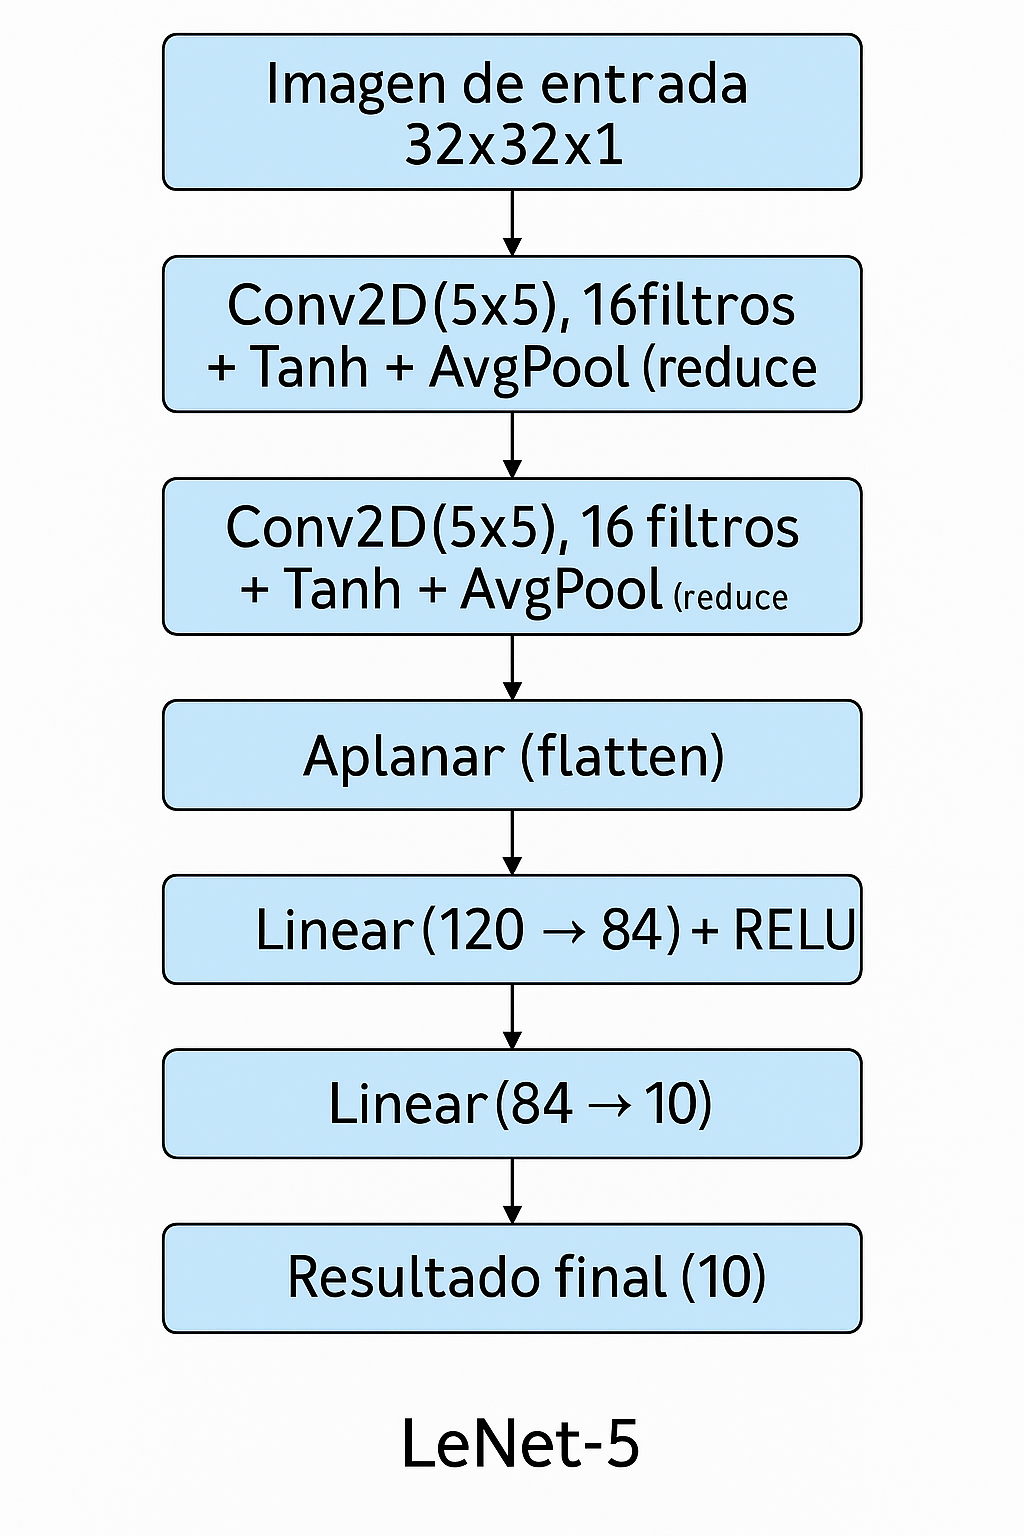

# AlexNet (Implementación en Keras)

AlexNet es una red profunda que se utilizó para ganar la competencia ImageNet 2012.

En Pytorch se puede descargar redes convolucionales con el paquete torchvision.

# import torchvision

Datasets famosos como CIFAR-10, ImageNet, etc.

Transformaciones para preprocesar imágenes.

Modelos preentrenados como ResNet, VGG, AlexNet, etc.

In [ ]:

import torchvision

alexnet = torchvision.models.AlexNet()
#Al escribir torchvision.models.AlexNet(), creas el modelo desde cero (sin pesos preentrenados),
#es decir, sus pesos se inicializan aleatoriamente.

alexnet
#Mostrará:
#features: las capas convolucionales.
#classifier: las capas completamente conectadas que hacen la clasificación final.

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:

output = alexnet(torch.randn(64, 3, 224, 224))
output.shape

torch.Size([64, 1000])

# Explicación del código, utilizando PyTorch.

torch.randn(64, 3, 224, 224)

Esto genera un tensor aleatorio de tamaño (64, 3, 224, 224).

Significa:

64: Número de imágenes (batch size = 64).
3: Número de canales por imagen (RGB = 3 canales).
224 x 224: Dimensiones de cada imagen (alto y ancho).

Este tensor simula un lote de 64 imágenes de color de 224x224 píxeles, como las que usa normalmente AlexNet.
output = alexnet(...)

Aquí se pasa ese tensor (las "imágenes") a través de la red AlexNet.

Internamente, AlexNet aplica:
Capas convolucionales → ReLU → MaxPooling
Después a capas densas (fully connected layers)
Calcula la predicción para cada imagen.
output.shape

Esto devuelve la forma (shape) del tensor output.
Normalmente para AlexNet, el resultado será de forma:
torch.Size([64, 1000])

¿Qué significa esto?

64: un vector de predicción por cada imagen del batch.

1000: número de clases.

AlexNet, cuando se entrena para ImageNet, predice 1000 clases diferentes.

# VGG16 (Implementación en Keras)

VGG16 es una de las redes más populares por su simplicidad y eficiencia al usar filtros pequeños de 3x3.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Cargar el modelo VGG16 preentrenado en ImageNet
model = VGG16(weights='imagenet')

# Resumen de la arquitectura
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# ResNet50 (Implementación en Keras)

ResNet es una arquitectura más profunda que utiliza conexiones residuales para ayudar en el entrenamiento de redes más profundas.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Cargar el modelo ResNet50 preentrenado en ImageNet
model = ResNet50(weights='imagenet')

# Resumen de la arquitectura
model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Cómo usar estos modelos para el entrenamiento?

Preprocesamiento de datos: En el caso de modelos como AlexNet, VGG16 y ResNet, los datos de entrada deben ser redimensionados a un tamaño adecuado y normalizados. Para las imágenes RGB, debes realizar el preprocesamiento correcto, como redimensionarlas y aplicar la normalización de acuerdo con la media y desviación estándar de las imágenes usadas en el preentrenamiento.

# 1. Configurar el entorno
Primero, asegúrarse de tener PyTorch y otras librerías necesarias instaladas:

In [ ]:
!pip install torch torchvision

# 2. Importar librerías y cargar los datos
Cargar el conjunto de datos CIFAR-10, que tiene 60,000 imágenes en 10 clases.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=4, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 57.6MB/s]


# 3. Definir la arquitectura de la CNN
En este caso, vamos a usar una CNN sencilla:

In [ ]:
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 canales de entrada, 6 filtros, tamaño 5x5
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling con tamaño de 2x2
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 canales de entrada, 16 filtros
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Capa completamente conectada
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)    # 10 clases en CIFAR-10

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # Aplanar la salida de la capa convolucional
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 4. Entrenar el modelo
Ahora, definimos los parámetros del modelo y entrenamos con los datos.

In [ ]:
net = CNNModel()

criterion = nn.CrossEntropyLoss()  # Función de pérdida
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Entrenamiento
for epoch in range(2):  # loop sobre el dataset varias veces
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # imprimir cada 2000 mini-lotes
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.175
[1,  4000] loss: 1.844
[1,  6000] loss: 1.667
[1,  8000] loss: 1.567
[1, 10000] loss: 1.535
[1, 12000] loss: 1.478
[2,  2000] loss: 1.399
[2,  4000] loss: 1.380
[2,  6000] loss: 1.334


KeyboardInterrupt: 

# 5. Evaluar el modelo
Finalmente, se evalúa el modelo usando el conjunto de test.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 55.33%


# Cómo usar una Red Neuronal Convolucional (CNN) para clasificar imágenes que el usuario tenga en su propio dispositivo:



# 1. Subir imágenes al entorno de Google Colab
Primero, carga tus imágenes a Google Colab. Puedes usar el siguiente código para subir archivos desde tu computadora:

In [ ]:
!pip install Pillow
from PIL import Image
import torch

img_path = '/content/dogs-7209506_1280.jpg'  # Reemplaza con el nombre de la imagen que subiste
img = Image.open(img_path)
img_tensor = transform(img).unsqueeze(0)  # Añadir dimensión de lote


2. Importar librerías necesarias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt


3. Definir la transformación para las imágenes
Convierte las imágenes a un formato que pueda ser utilizado por el modelo:

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),           # Redimensionar imagen
    transforms.CenterCrop(224),       # Recortar la imagen
    transforms.ToTensor(),            # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalización
])


4. Cargar un modelo preentrenado (por ejemplo, ResNet-18)

In [ ]:
model = models.resnet18(pretrained=True)
model.eval()  # Establecer el modelo en modo evaluación


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 135MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

5. Hacer una predicción con la imagen

In [ ]:
with torch.no_grad():
    output = model(img_tensor)

# Obtener la clase predicha
_, predicted = torch.max(output, 1)
print(f'Predicted class: {predicted.item()}')


Predicted class: 429


6. Mostrar la imagen cargada

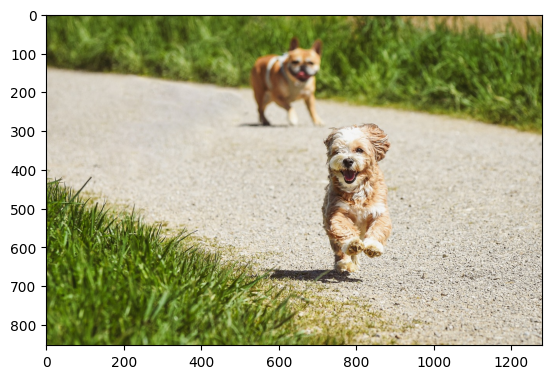

In [ ]:
plt.imshow(img)
plt.show()


# Con los modelos vistos

Definir los modelos, cargar los modelos preentrenados:

In [ ]:
lenet = models.alexnet(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
resnet18 = models.resnet18(pretrained=True)

# Poner los modelos en modo evaluación
lenet.eval()
alexnet.eval()
vgg16.eval()
resnet18.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 118MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Hacer una predicción con cada modelo:

In [ ]:
with torch.no_grad():
    lenet_output = lenet(img_tensor)
    alexnet_output = alexnet(img_tensor)
    vgg16_output = vgg16(img_tensor)
    resnet_output = resnet18(img_tensor)

# Obtener las clases predichas
lenet_pred = torch.argmax(lenet_output)
alexnet_pred = torch.argmax(alexnet_output)
vgg16_pred = torch.argmax(vgg16_output)
resnet_pred = torch.argmax(resnet_output)

print(f'LeNet Predicted class: {lenet_pred.item()}')
print(f'AlexNet Predicted class: {alexnet_pred.item()}')
print(f'VGG16 Predicted class: {vgg16_pred.item()}')
print(f'ResNet Predicted class: {resnet_pred.item()}')


LeNet Predicted class: 138
AlexNet Predicted class: 138
VGG16 Predicted class: 185
ResNet Predicted class: 429


Interpretar la clase predicha:
Si estás usando un modelo preentrenado con ImageNet, las clases predichas son índices de las categorías de ImageNet. Puedes utilizar la lista de etiquetas de ImageNet para traducir estos índices a nombres legibles.
 [enlace](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/)



# **Actividad**

*   Comparar diferentes imagenes y establecer su importancia y analizar.
*   Ventajas y desventajas.

